# Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

__1. Даны значения зарплат из выборки выпускников:__

__100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150__

__Своими руками (т.е. без использования статистических функций вроде mean, std, var) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.__

__Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.__

In [1]:
import numpy as np
import pandas as pd


salary = (100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150)

my_mean = 0
n = 0
for elm in salary:
    my_mean += elm
    n += 1
my_mean = my_mean/n
print(f'Среднее арифметическое = {my_mean}, {my_mean==np.mean(salary)}, {len(salary)==n}')


var_bias = 0
for elm in salary:
    var_bias += (elm - my_mean)**2
var_bias = var_bias/n
print(f'Смещенная оценка дисперсии = {var_bias}, {round(var_bias, 10)==round(np.var(salary, ddof=0), 10)}')

var_unbias = 0
for elm in salary:
    var_unbias += (elm - my_mean)**2
var_unbias = var_unbias/(n-1)
print(f'Несмещенная оценка дисперсии = {var_unbias}, {round(var_unbias, 10)==round(np.var(salary, ddof=1), 10)}')
np.var(salary, ddof=1)

st_dev = 0
for elm in salary:
    st_dev += (elm - my_mean)**2
st_dev = np.sqrt(st_dev/n)
print(f'Среднее квадратичное отклонение = {st_dev}, {round(st_dev, 14)==round(np.std(salary), 14)}')

Среднее арифметическое = 73.14285714285714, True, True
Смещенная оценка дисперсии = 2135.074829931973, True
Несмещенная оценка дисперсии = 2241.8285714285716, True
Среднее квадратичное отклонение = 46.20686994302874, True


__2. Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot.__

__В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.__

Медиана равна = 70, True
Первый квартиль = 45, True
Третий квартиль = 84, True
Интерквартильный размах = 39, True


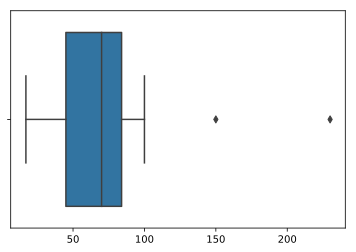

In [2]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='svg'


def median_search(array, ln_arr):

    if len(array) == 1:
        return array[0]

    pivot = random.choice(array)
    lows = []
    highs = []
    pivots = []

    for itm in array:
        if itm < pivot:
            lows += [itm]
        elif itm > pivot:
            highs += [itm]
        else:
            pivots += [itm]

    if ln_arr < len(lows):
        return median_search(lows, ln_arr)
    elif ln_arr < len(lows) + len(pivots):
        return pivots[0]
    else:
        return median_search(highs, ln_arr - len(lows) - len(pivots))
    

mdn = median_search(salary, n//2)
print(f'Медиана равна = {mdn}, {mdn==np.median(salary)}')

ge_mdn, le_mdn = [], []

for elm in salary:
    if elm >= mdn:
        ge_mdn.append(elm)
    else:
        le_mdn.append(elm)

quart_1 = median_search(le_mdn, n//4)
quart_3 = median_search(ge_mdn, n//4)
print(f'Первый квартиль = {quart_1}, {quart_1==np.quantile(salary, 0.25)}')
print(f'Третий квартиль = {quart_3}, {quart_3==np.quantile(salary, 0.75)}')
interquart = quart_3 - quart_1
print(f'Интерквартильный размах = {interquart}, {interquart==(np.quantile(salary, [0.25, 0.75])*(-1, 1)).sum()}')

sns.boxplot(salary);

Два явных выброса: 150 и 230

__3. В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?__

__Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.__

Вероятность того, что наугад выбранный студент будет из определенного факультета: из $P(A) = \dfrac{1}{4}$, из $P(B) = \dfrac{1}{4}$, из $P(C) = \dfrac{2}{4} = \dfrac{1}{2}$

Вероятность сдачи случайным студентом сессии: $P_{сдачи} = P(A)*P(сдал|A) + P(B)*P(сдал|B) + P(C)*P(сдал|C)$

По формуле Байеса:

а) $P(A|сдал) = P(A)*P(сдал|A)/P_{сдачи}$

б) $P(B|сдал) = P(B)*P(сдал|B)/P_{сдачи}$

в) $P(C|сдал) = P(C)*P(сдал|C)/P_{сдачи}$

In [3]:
P_passed = 0.25*0.8 + 0.25*0.7 + 0.5*0.9
P_A_pass = 0.25*0.8/P_passed
P_B_pass = 0.25*0.7/P_passed
P_C_pass = 0.5*0.9/P_passed
print(f'а)\tВероятность, что сдавший студен на факультете A = {P_A_pass} = {P_A_pass:%}')
print(f'б)\tВероятность, что сдавший студен на факультете B = {P_B_pass} = {P_B_pass:%}')
print(f'в)\tВероятность, что сдавший студен на факультете C = {P_C_pass} = {P_C_pass:%}')
print(f'Проверка на полную вероятность: {P_A_pass+P_B_pass+P_C_pass==1}')

а)	Вероятность, что сдавший студен на факультете A = 0.24242424242424246 = 24.242424%
б)	Вероятность, что сдавший студен на факультете B = 0.21212121212121213 = 21.212121%
в)	Вероятность, что сдавший студен на факультете C = 0.5454545454545455 = 54.545455%
Проверка на полную вероятность: True
